# The Matlab Waveform class
This tool facilitates creating waveforms for simulations or measurements. Each waveform type is defined in a seperate class definition file. All of these classes are subclasses of the abstract superclass `Waveform`. Most of the code for handling waveform objects is contained in the superclass so that the amount of code necessary to incorporate new waveform types, via a new subclass definition file, is minimal. The Waveform class has properties:

In [1]:
properties Waveform


Properties for class Waveform:

    dt
    T
    I
    shutter
    map



where `dt` is the sample rate in S/sec, `T` is the total time in sec, and `I` is the waveform. The properties `shutter` and `map` are specific to instrumentation waveforms and are discussed later. Subclasses inherit these properties but may also have any number of additional properties that are specific to them. For example, one waveform type is `Steps`. Use the `help` command to view a list of the properties and default values for `Steps`:

In [ ]:
help Steps

  Steps Waveform object. Creates a set of evenly spaced steps
  of constant height. 
  Properties and defaults:
   dt = 0.0001,            Sampling period, in sec
   tOn = 0.1,              Duration of pulse, in seconds
   tOff = 0.1,             Duration of time between pulses, in seconds
   height = 0.2,           Amplitude of the first pulse relative to offset
   offset = 0,             Offset value from 0
   Nsteps = 5,             Number of pulses, postive integer

    Reference page in Doc Center
       doc Steps




In [8]:
% The following creates an instance of the object with default values:
obj1 = Steps();
% Pass name-value pairs to set properties to specific values:
obj1 = Steps('tOn', 0.2, 'tOff', 0.05, 'offset', 0.1);

Each subclass must implement a 'makeWaveform' method that sets the value of `I`. This method contains all subclass specific computation of the waveform, however, it is not necessarily the final outputted waveform. The superclass will perform nonspecific modifications of the waveform if the properties `shutter` or `map` are set. The property `map` can be set to any function handle with signiture `wf = fun(wf)` where `wf` is a one dimensional array. The function `fun` must be on the Matlab path. Mappings are useful to address issues such as AOTF/Pockels-cell nonlinearity, or other instrument related transformations. For example, a calibration of an AOTF was used to create the mapping function `blueLaser`. Lets compare a `Ramp` waveform before and after a mapping:

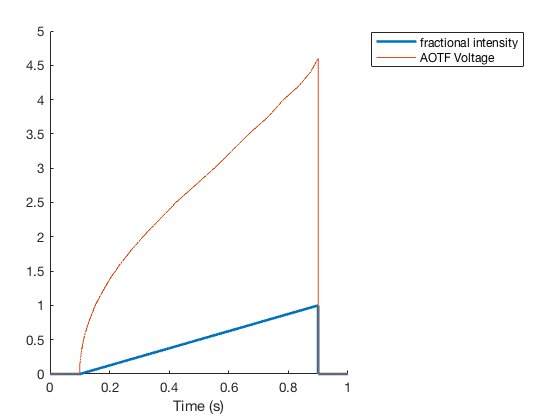

In [3]:
ax = Ramp().plot('LineWidth', 2);
Ramp().set('map', @blueLaser).plot(ax);
legend({'fractional intensity', 'AOTF Voltage'}, ...
'location', 'northeastoutside')

The base waveform, returned by `Ramp()`, defines the fractional intensity, whereas the mapped waveform gives the corresponding AOTF voltage. By having a map for lasers, for example, one can always use a range 0 to 1 for waveform objects and safely assume a linearly proportional light intensity.

The property `shutter` defines a special map that is applied after `map`. It is used to created logical waveforms for driving shutters. If `shutter` is set to a three element array with definitions `[level, timeB4, timeAft]`, the map first creates a logical waveform that is true whenever waveform > `level`. To account for shutter delays, all rising edges are then moved to an eariler time given by `timeBefore` (in ms) and all falling edges are moved to a later time `timeAfter`. If adjacent rising and falling edges are shifted such that they cross, then the waveform just remains high. Example (with exagerated delays):

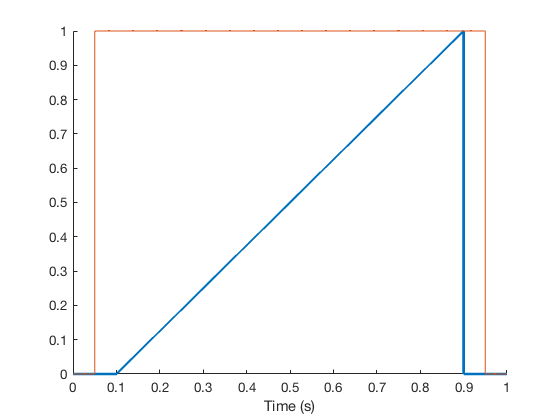

In [4]:
ax = Ramp().plot('LineWidth', 2);
Ramp().set('shutter', [0, 50, 50]).plot(ax);

To manually recompute a waveform and apply its mappings, call the superclass method `makeOutputWaveform`.

In [3]:
% To change properties after instantiation of the object, use the 'set' method:
obj1 = Steps();
obj1.set('tOn', 0.25, 'tOff', 0.05, 'offset', 0.1);
% It is better to use 'set', because it automatically recomputes the output waveform.
% If you set properties with dot notation, however,
% you have to manually call the method 'makeOutputWaveform':
obj1.tOn = 0.2;
obj1.tOff = 0.1;
obj1.makeOutputWaveform();
% moreover, set is NOT case sensitive: 
set(obj1, 'ton', 1) % does not give an error but obj1.ton = 1 will

In [6]:
% There is a basic plot method.
% You can optionally pass either an axis handle,
% and/or any Line Properties (in that order). 
% i.e.,  obj.plot(axHandle, LINE PROPERTIES)
% you can always get the help for methods if you forget!
help waveform.plot

  ax = WaveformObj.plot();
  ax = WaveformObj.plot(axisHandle);
  ax = WaveformObj.plot(LINE PROPERTIES);
  ax = WaveformObj.plot(axisHandle, LINE PROPERTIES);
 
  Builds a plot of the total waveform (if waveform is an object
  array) with each piece of the waveform in a different color.
  If you just want a plot of the total waveform having a single
  line, use plot(obj.getWaveformTimes, get(obj, 'I'))



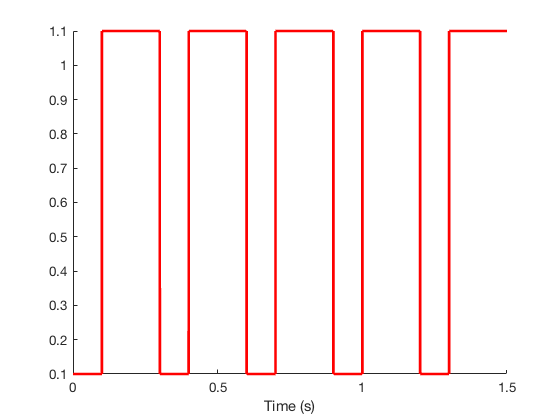

In [3]:
% here is an example of setting line properties:
obj1.plot('LineWidth', 2, 'Color', 'r');

In [28]:
% you can also get property values in two ways:
obj1.get('tOn');           % gets one property
obj1.tOn;                  % gets one property
obj1.get({'tOn', 'tOff'}); % can get multiple using cell array

## Subclasses

--- help for SquareWave ---

  SquareWave Waveform object. When the phase is zero, the signal starts at
  a rising edge for any duty cycle. 
  Properties and defaults:
    dt = 0.0001     Sampling period, in sec
    T = 1           Total time, in seconds
    f = 50          Frequency, in Hz
    phase = 0       Phase offset, in radians
    duty = 0.5      Duty cycle (fraction of on vs off)
    height = 1      Height of pulses above offset
    offset = 0      Offset value from 0

    Reference page in Doc Center
       doc SquareWave




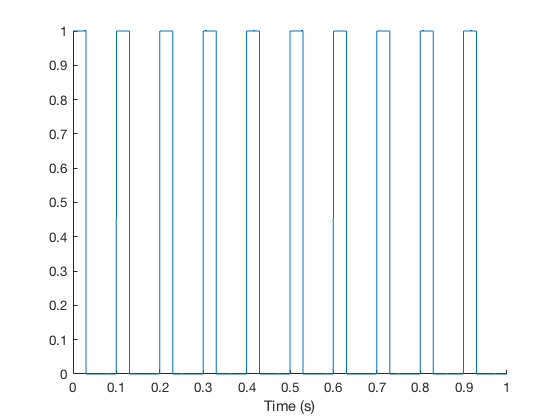

In [13]:
help SquareWave() % sometimes eaiser than Steps()
stimObj0 = SquareWave('f', 10, 'duty', 0.3);
stimObj0.plot();

  Ramp Waveform object. Creates a single ramp.
  Properties and defaults:
   dt = 0.0001,     Sampling period, in sec
   tBefore = 0.1    Duration at offset before ramp, in seconds
   tRamp = 0.8      Duration of ramp, in seconds
   tAfter = 0.1     Duration at offset after ramp, in seconds
   offset = 0       offset from zero
   height = 1       End value of the ramp, relative to offset

    Reference page in Doc Center
       doc Ramp




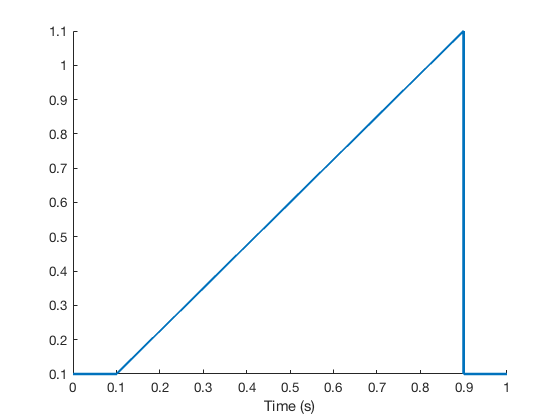

In [14]:
help Ramp
stimObj2 = Ramp('offset', 0.1);
stimObj2.plot('LineWidth', 2);

  StepRamp Waveform object. Creates a set of evenly spaced steps
  of linearlly increasing height. An off-time can be placed between steps.
  Properties and defaults:
   dt = 0.0001,            Sampling period, in sec
   tOn = 0.1,              Duration of pulse, in seconds
   tOff = 0.1,             Duration of time between pulses, in seconds
   heightFirst = 0.2,      Amplitude of the first pulse relative to offset
   heightLast = 1,         Amplitude of the last pulse relative to offset
   offset = 0,             Offset value from 0
   Nsteps = 5,             Number of steps, postive integer

    Reference page in Doc Center
       doc StepRamp




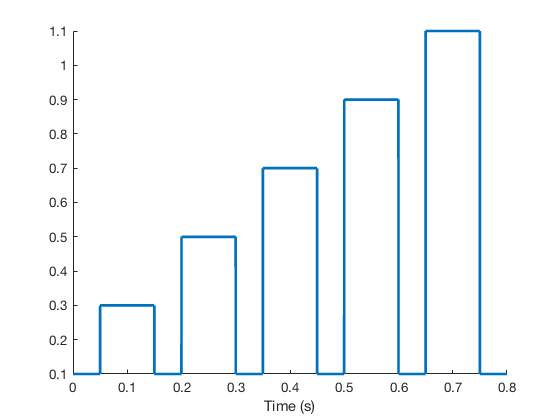

In [29]:
help StepRamp
stimObj3 = StepRamp('offset', 0.1, 'tOff', 0.05);
stimObj3.plot('LineWidth', 2);

  PulseModulated Waveform object. Creates pulse train of constant duty
  cycle (mean stimulus) and sin-modulated frequency. 
  Properties and defaults:
    dt = 0.0001     Sampling period, in sec
    T = 1           Total time, in seconds
    fcarrier = 50   Center pulse frequency, in Hz
    fmod = 1        Modulation frequency, in Hz
    amod = 20       Modulation amplitude, in Hz
    duty = 0.5      Duty cycle (fraction of on vs off)
    height = 1      Height of pulses above offset
    offset = 0      Offset value from 0

    Reference page in Doc Center
       doc PulseModulated




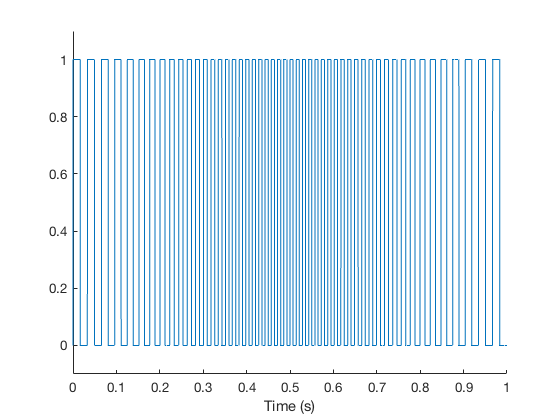

In [30]:
help PulseModulated
% Note that avg power (i.e., duty cycle) is constant
stimObj4 = PulseModulated();
ax = stimObj4.plot();
ax.YLim = [-0.1 1.1];

  SinVariance Waveform object. Creates a waveform with constant mean and
  sin modulated variance. The variance is uniformly distributed and
  fluctuates over a characteristic timescale
  Properties and defaults:
    dt = 0.0001     Sampling period, sec
    T = 1           Total time of the stimulus, sec
    tau = 0.003     Characteristic timescale of fluctuations, sec
    I0 = 1          Mean value
    sigma0 = 1      Central variance
    dSigma = 0.5    Variance modulation amplitude
    sigmaF = 0.2    Variance modulation frequency, Hz

    Reference page in Doc Center
       doc SinVariance




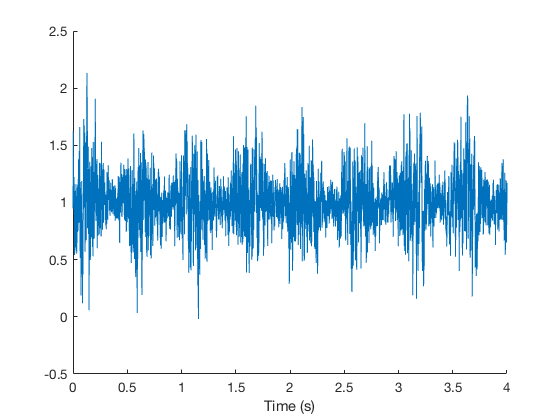

In [31]:
% from Pozzorini, PLOS 2015 & 2016. Ornstein–Uhlenbeck process with sin modulated variance
help SinVariance
stimObj5 = SinVariance('sigmaF', 2, 'sigma0', 0.2, 'T', 4);
stimObj5.plot();

  Constant Waveform object. Creates a constant waveform.
  Properties and defaults:
   dt = 0.0001,     Sampling period, in sec
   T = 1            Duration, in sec
   value = 1        Value of the waveform

    Reference page in Doc Center
       doc Constant




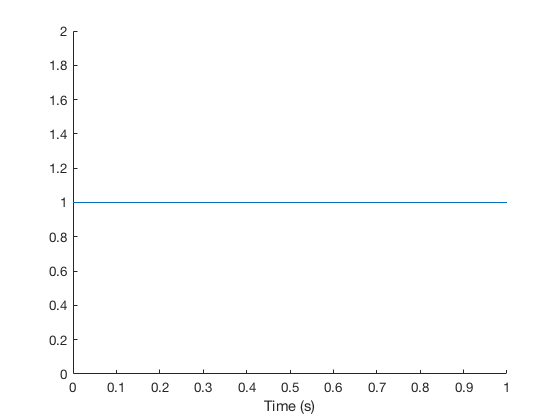

In [32]:
help Constant  % Constant Value
stimObj6 = Constant('value', 1);
stimObj6.plot();

  SinAmpMod Waveform object. Creates a amplitude modulated sin wave.
  Properties and defaults:
    dt = 0.0001     Sampling period, in sec
    T = 1           Total time, in seconds
    fcarrier = 50   Carrier frequency, in Hz
    fmod = 1        Amplitude modulation frequency, in Hz
    amod = 1       Modulation amplitude
    height = 1      Height of waveform above offset
    offset = 0      Offset value from 0

    Reference page in Doc Center
       doc SinAmpMod




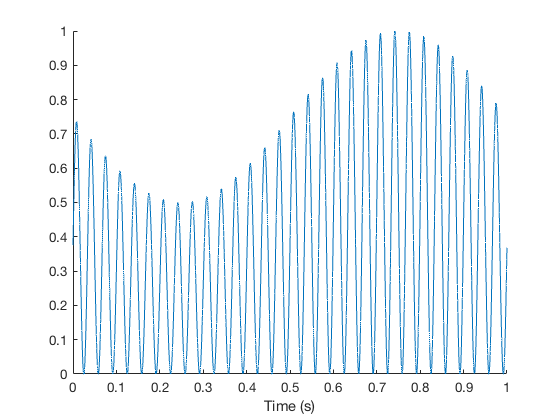

In [33]:
help SinAmpMod
stimObj7 = SinAmpMod('fcarrier', 30, 'amod', 0.5, 'fmod', 1);
stimObj7.plot();

## Object Arrays

In [ ]:
% The superclass `Waveform` inherits from matlab.mixin.Heterogeneous,
% which enables the creation of heterogeneous subclass object arrays. 
objAr = [StepRamp(), Ramp()]


objAr = 

  1x2 heterogeneous Waveform (StepRamp, Ramp) array with properties:

    dt
    T
    I
    shutter
    map




ans =

           1       21000



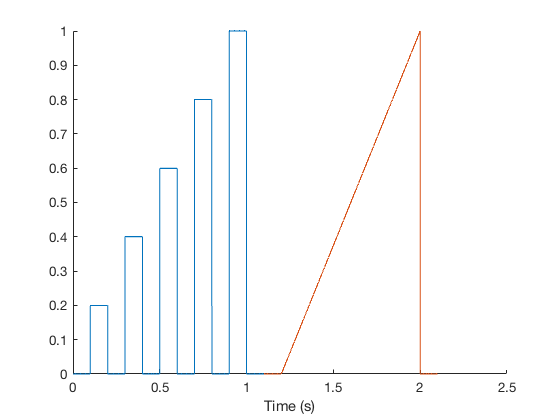

In [35]:
% the 'get' method is overloaded for Waveform object arrays. 
% Therefore, objAr.prop != objAr.get('prop'), rather, 
% waveforms (I) are concatenated and waveform times (T) are added.
size(objAr.get('I'))
objAr.get('T')
objAr.plot();


ans = 

  1x4 Ramp array with properties:

    tBefore
    tRamp
    tAfter
    offset
    height
    dt
    T
    I
    shutter
    map



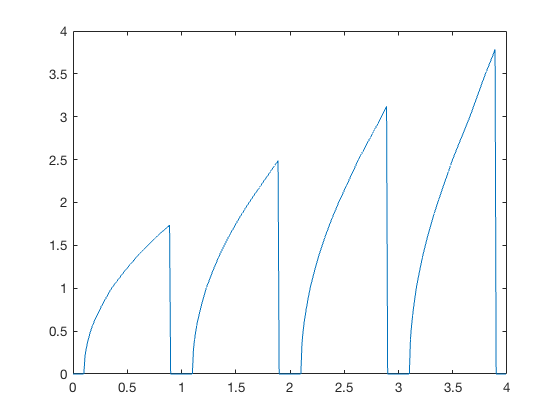

In [1]:
% If one always uses the 'get' method instead of dot notation to read 'I', and 'T', 
% then single objects and object arrays behave identically in your code. 
% In this way, a general waveform can be pieced together from various simplier bits.
% Create a waveform of ramps with increasing slopes:
objAr = [Ramp('height', 0.2), Ramp('height', 0.4), Ramp('height', 0.6), Ramp('height', 0.8)];
% If all objects in an array share a property, then you can set them all at once with set()
% Decrease sampling rate of all Ramps to 0.01, and set a map:
set(objAr, 'dt', 0.01, 'map', @blueLaser)
% get the waveform data
I = get(objAr, 'I');
% plot the waveform with Matlabs' built-in plot function
plot(objAr.getWaveformTimes, I);

In [2]:
% For object arrays, the dot notation objAr.prop returns multiple outputs that 
% can be captured in a cell array, so if you want the individual properties of each part:
{objAr.I}


ans =

  1x4 cell array

    {1x100 double}    {1x100 double}    {1x100 double}    {1x100 double}



In [ ]:
% To save and load a Waveform Object, use the save and load commands
save myWaveformFile objAr
clear objAr
load myWaveformFile objAr
% when concurrently working with several objects that contain large 
% amounts of data, it is useful to save them as .mat files,
% then re-load them as a matfile object:
save myWaveformFile objAr
clear objAr
objAr_mf = matfile('myWaveformFile.mat');
% objAr_mf is just a pointer to a file. You can access the
% properties on demand like this:
waveform = get(objAr_mf.objAr, 'I');

In [ ]:
% it is useful to know that matlab can resolve properties and methods
% from a string:    obj.method == obj.('method')
mf_obj = matfile('myStimulusFile.mat');
objName = properties(mf_obj);
objName = objName{2}; % name of Waveform array
propName = 'I';
p = get(mf_obj.(objName), propName);
% the above can be wrapped in a function to grap a property 
% from a saved .mat file. (class must support get/set interface)

In [ ]:
% finally, Waveform is derived from a handle class. Therefore, we do not need to assign
% the variable when modifying it. 'obj' is just a handle to the object. So this:
set(obj, 'dt', 0.01);
% is the same as this:
obj = set(obj, 'dt', 0.01);
% However, if you reassign an object or object array, the data is not copied! 
obj2 = obj; % stim and stim2 are identical pointers. modifying one modifies the other.
obj == obj2 % returns true because they are same handle
% to make a copy, use the copy method:
obj2 = obj.copy(); 
obj == obj2 % returns false because handles are not equal, even though their data is equal.